In [1]:
#type:ignore
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Load dataset
df = pd.read_csv('./daraz_data2.csv')
# Download NLTK data
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\WIN
[nltk_data]     10\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
# Display the first few rows of the dataset
df.head()



,Unnamed: 0,reviews,Sentiments
0,0,original as shown in advertisement.\ngood qual...,1
1,1,"Same as shown in picture. Received same color,...",1
2,2,"comfortable, and very soft item, love it and m...",1
3,3,it was packed well... same as shown ..i ordere...,1
4,4,for healthy Bady sitting space is less to sit....,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21415 entries, 0 to 21414
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21415 non-null  int64 
 1   reviews     21415 non-null  object
 2   Sentiments  21415 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 502.0+ KB


In [5]:
# Display basic statistics about the dataset
df.describe()


,Unnamed: 0,Sentiments
count,21415.000000,21415.000000
mean,10707.000000,0.719449
std,6182.122343,0.534005
min,0.000000,-1.000000
25%,5353.500000,1.000000
50%,10707.000000,1.000000
75%,16060.500000,1.000000
max,21414.000000,1.000000


In [6]:
# Display the lat few rows of the dataset
df.tail()


,Unnamed: 0,reviews,Sentiments
21410,21410,such a useful thing,1
21411,21411,It is really nice,1
21412,21412,Not really useful,-1
21413,21413,waste of money ..,-1
21414,21414,Loved it!!,1


In [7]:
# Display the types of columns of the dataset
df.dtypes


Unnamed: 0     int64
reviews       object
Sentiments     int64
dtype: object

In [8]:
# Count unique values in each column
df.nunique()


Unnamed: 0    21415
reviews       16467
Sentiments        3
dtype: int64

In [9]:
# Check for missing values
df.isnull().sum()


Unnamed: 0    0
reviews       0
Sentiments    0
dtype: int64

In [10]:
# Visualize the distribution of sentiments
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

ValueError: Could not interpret value `Sentiment` for `x`. An entry with this name does not appear in `data`.

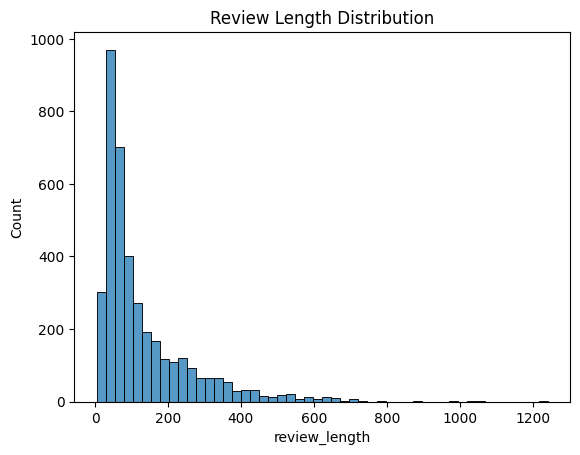

In [268]:
# Analyze the length of reviews
df['review_length'] = df['Review'].apply(len)
sns.histplot(df['review_length'], bins=50)
plt.title('Review Length Distribution')
plt.show()

In [269]:
# Display the distribution of review lengths
print(df['review_length'].describe())

count    3923.000000
mean      130.972470
std       130.762682
min         5.000000
25%        48.000000
50%        79.000000
75%       167.000000
max      1242.000000
Name: review_length, dtype: float64


In [270]:
import nltk

# Download the WordNet data
nltk.download('wordnet')

# Additionally, download 'omw-1.4' which is needed for lemmatization
nltk.download('omw-1.4')

# If you're tokenizing, you might also need to download 'punkt'
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [271]:
df.columns

Index(['Review', 'Sentiment', 'review_length'], dtype='object')

In [272]:
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Define the preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Handle emojis (optional)
    text = text.encode('ascii', 'ignore').decode('ascii')

    # Convert to lowercase
    text = text.lower()

    # Remove all single characters
    text = re.sub(r'\b\w\b', '', text)

    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    words = word_tokenize(text)

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Assume 'df' is your DataFrame containing 'Review' and 'Sentiment' columns
# Apply preprocessing to the 'Review' column of your existing DataFrame
df['cleaned_review'] = df['Review'].apply(preprocess_text)

# Display the updated DataFrame with 'Sentiment', 'Review', and 'cleaned_review'
print(df[['Sentiment', 'Review', 'cleaned_review']].head())

  Sentiment                                             Review  \
0  Positive     mil gya hai acha hai aur toota howa b nai hai    
1  Positive  aram sy pocket me a jta hai aur quality b achi...   
2  Positive  sb sy achi chez apki customer service bhot ach...   
3  Positive  back cover acha hai  sai cuts hai aur soft b h...   
4  Negative  shru me me thumb grip k khalif thi kyu k extra...   

                                      cleaned_review  
0        mil gya hai acha hai aur toota howa nai hai  
1        aram sy pocket jta hai aur quality achi hai  
2  sb sy achi chez apki customer service bhot ach...  
3  back cover acha hai sai cut hai aur soft hai k...  
4  shru thumb grip khalif thi kyu extra chezy add...  


In [273]:
df.columns

Index(['Review', 'Sentiment', 'review_length', 'cleaned_review'], dtype='object')

#Splitting the dataset into training (80%) and testing (20%) sets

In [274]:
df.head()

,Review,Sentiment,review_length,cleaned_review
0,mil gya hai acha hai aur toota howa b nai hai,Positive,46,mil gya hai acha hai aur toota howa nai hai
1,aram sy pocket me a jta hai aur quality b achi...,Positive,50,aram sy pocket jta hai aur quality achi hai
2,sb sy achi chez apki customer service bhot ach...,Positive,79,sb sy achi chez apki customer service bhot ach...
3,back cover acha hai sai cuts hai aur soft b h...,Positive,215,back cover acha hai sai cut hai aur soft hai k...
4,shru me me thumb grip k khalif thi kyu k extra...,Negative,384,shru thumb grip khalif thi kyu extra chezy add...


In [275]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df is your DataFrame with 'cleaned_review' and 'Sentiment' columns
# Example: df = pd.read_csv('your_dataset.csv')

# Check for NaN values in the DataFrame
print("Checking for NaN values in the DataFrame...")
print(f"NaN values in 'cleaned_review': {df['cleaned_review'].isnull().sum()}")
print(f"NaN values in 'Sentiment': {df['Sentiment'].isnull().sum()}")

# Drop rows with NaN values in 'cleaned_review' or 'Sentiment'
df_cleaned = df.dropna(subset=['cleaned_review', 'Sentiment'])

# Filter out 'Neutral' sentiments
df_cleaned = df_cleaned[df_cleaned['Sentiment'] != 'Neutral']

# Verify that the 'Neutral' entries have been removed
print("\nRemaining unique values in 'Sentiment':", df_cleaned['Sentiment'].unique())

# Define features and target variable
X = df_cleaned['cleaned_review']  # Features
y = df_cleaned['Sentiment'].map({'Positive': 1, 'Negative': 0})  # Convert sentiments to binary

# Step 2: Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Vectorize the Text
vectorizer = CountVectorizer(binary=True)
X_train_vectorized = vectorizer.fit_transform(X_train).toarray()  # Convert training data to dense array
X_test_vectorized = vectorizer.transform(X_test).toarray()  # Transform test data

# Display the shapes of the resulting datasets
print(f"Training data shape: {X_train_vectorized.shape}")
print(f"Test data shape: {X_test_vectorized.shape}")

Checking for NaN values in the DataFrame...
NaN values in 'cleaned_review': 0
NaN values in 'Sentiment': 0

Remaining unique values in 'Sentiment': ['Positive' 'Negative']
Training data shape: (2684, 6293)
Test data shape: (671, 6293)


In [276]:
# check unique values in sentiment
df['Sentiment'].unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [277]:

# Check for NaN values in the DataFrame
print("Checking for NaN values in the DataFrame...")
print(f"NaN values in 'cleaned_review': {df['cleaned_review'].isnull().sum()}")
print(f"NaN values in 'Sentiment': {df['Sentiment'].isnull().sum()}")

Checking for NaN values in the DataFrame...
NaN values in 'cleaned_review': 0
NaN values in 'Sentiment': 0


#Splitting the dataset into training (80%) and testing (20%) sets

#Feature Extraction


#Training Model


In [278]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# List of models to evaluate
models = {
    'SGD Classifier': SGDClassifier(max_iter=1000, tol=1e-3, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Dictionary to store accuracy scores for each model
model_accuracies = {}

# Train each traditional model and calculate accuracy
for name, model in models.items():
    print(f"Training {name}...")

    # Cross-validation accuracy
    cv_scores = cross_val_score(model, X_train_vectorized, y_train, cv=3, scoring='accuracy')

    # Fit model on the training data
    model.fit(X_train_vectorized, y_train)

    # Predict on the test data
    y_pred_val = model.predict(X_test_vectorized)

    # Accuracy score on the test set
    accuracy = accuracy_score(y_test, y_pred_val)

    # Store the accuracy score
    model_accuracies[name] = accuracy
    print(f"{name} Cross-Validation Accuracy: {cv_scores.mean():.4f}, Test Accuracy: {accuracy:.4f}")

# Step to add the deep learning model
print("\nTraining Deep Learning Model...")

# Define the neural network model
deep_model = keras.Sequential([
    layers.Input(shape=(X_train_vectorized.shape[1],)),  # Number of features
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
deep_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
deep_model.fit(X_train_vectorized, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the deep learning model
loss, accuracy = deep_model.evaluate(X_test_vectorized, y_test, verbose=0)
print(f"Deep Learning Model Accuracy: {accuracy:.4f}")

# Include deep learning model accuracy in the results
model_accuracies['Deep Learning Model'] = accuracy

# Find the best model based on accuracy
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_accuracy = model_accuracies[best_model_name]

print(f"\nThe best model is: {best_model_name} with an accuracy of {best_model_accuracy:.4f}")

Training SGD Classifier...
SGD Classifier Cross-Validation Accuracy: 0.8405, Test Accuracy: 0.8629
Training Logistic Regression...
Logistic Regression Cross-Validation Accuracy: 0.8428, Test Accuracy: 0.8823
Training Random Forest...
Random Forest Cross-Validation Accuracy: 0.8007, Test Accuracy: 0.8122
Training Gradient Boosting...
Gradient Boosting Cross-Validation Accuracy: 0.8133, Test Accuracy: 0.8212
Training AdaBoost...
AdaBoost Cross-Validation Accuracy: 0.8193, Test Accuracy: 0.8376
Training Support Vector Classifier...
Support Vector Classifier Cross-Validation Accuracy: 0.8186, Test Accuracy: 0.8510
Training Decision Tree...
Decision Tree Cross-Validation Accuracy: 0.7709, Test Accuracy: 0.7839
Training K-Nearest Neighbors...
K-Nearest Neighbors Cross-Validation Accuracy: 0.7321, Test Accuracy: 0.7452

Training Deep Learning Model...
Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6874 - loss: 0.5953
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accur

Models and their accuracies: {'SGD Classifier': 0.8628912071535022, 'Logistic Regression': 0.8822652757078987, 'Random Forest': 0.812220566318927, 'Gradient Boosting': 0.8211624441132638, 'AdaBoost': 0.8375558867362146, 'Support Vector Classifier': 0.8509687034277198, 'Decision Tree': 0.7839046199701938, 'K-Nearest Neighbors': 0.7451564828614009, 'Deep Learning Model': 0.8614009022712708}


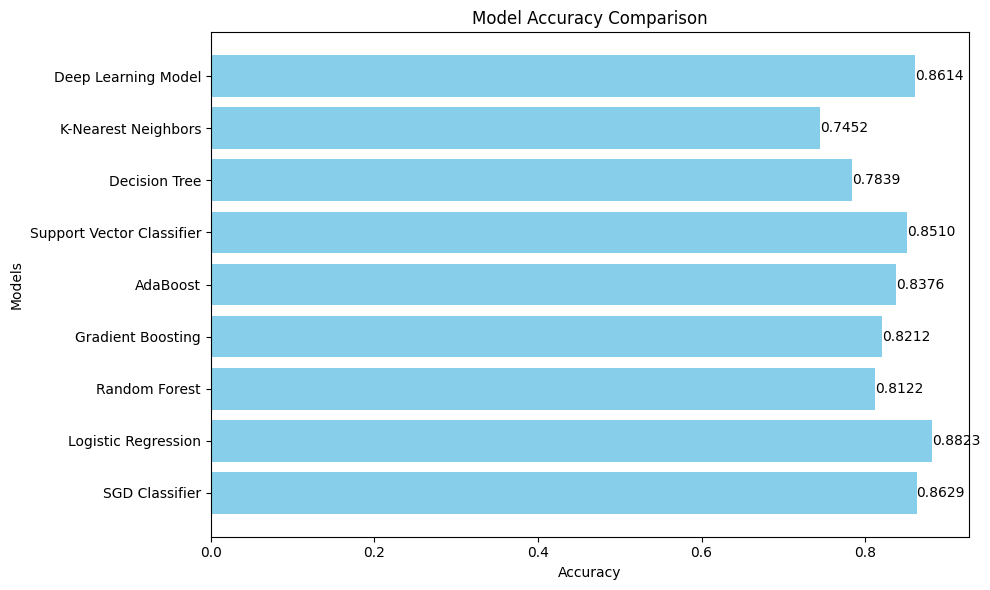

In [279]:
import matplotlib.pyplot as plt

# Check if all models are present in model_accuracies
print("Models and their accuracies:", model_accuracies)

# Create a bar plot to compare model accuracies
plt.figure(figsize=(10, 6))

# Plot the accuracies
plt.barh(list(model_accuracies.keys()), list(model_accuracies.values()), color='skyblue')

# Add labels and title
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')

# Add accuracy values next to each bar
for index, (name, accuracy) in enumerate(model_accuracies.items()):
    plt.text(accuracy, index, f'{accuracy:.4f}', va='center')

# Display the plot
plt.tight_layout()
plt.show()


#Cross-Validation Classification Report


In [282]:
from sklearn.metrics import classification_report

# Assuming you have already trained your models and stored them in the `models` dictionary
# and you have the predictions for each model in y_pred_val.

# Generate and print classification reports for each model
for name, model in models.items():
    # Predict on the test set using the current model
    y_pred_val = model.predict(X_test_vectorized)

    # Generate the classification report
    report = classification_report(y_test, y_pred_val)

    # Print the classification report
    print(f"Classification Report for {name}:\n{report}")

# For the deep learning model
y_pred_deep = deep_model.predict(X_test_vectorized)
y_pred_deep = (y_pred_deep > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

# Generate and print the classification report for the deep learning model
report_deep = classification_report(y_test, y_pred_deep)
print(f"Classification Report for Deep Learning Model:\n{report_deep}")

Classification Report for SGD Classifier:
              precision    recall  f1-score   support

           0       0.83      0.66      0.74       196
           1       0.87      0.95      0.91       475

    accuracy                           0.86       671
   macro avg       0.85      0.80      0.82       671
weighted avg       0.86      0.86      0.86       671

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       196
           1       0.89      0.95      0.92       475

    accuracy                           0.88       671
   macro avg       0.88      0.83      0.85       671
weighted avg       0.88      0.88      0.88       671

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.86      0.42      0.57       196
           1       0.80      0.97      0.88       475

    accuracy                           0.81       67

#Validation Set Classification Report


In [284]:
from sklearn.metrics import classification_report

# Assuming you have the Logistic Regression model already trained
log_reg_model = models['Logistic Regression']

# Predict on the test set using the Logistic Regression model
y_pred_log_reg_val = log_reg_model.predict(X_test_vectorized)

# Generate the classification report for validation set predictions
report_log_reg_val = classification_report(y_test, y_pred_log_reg_val)

# Print the classification report for Logistic Regression on the validation set
print("Classification Report for Logistic Regression (Validation Set):")
print(report_log_reg_val)

Classification Report for Logistic Regression (Validation Set):
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       196
           1       0.89      0.95      0.92       475

    accuracy                           0.88       671
   macro avg       0.88      0.83      0.85       671
weighted avg       0.88      0.88      0.88       671



In [285]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg_val))


Confusion Matrix:
[[139  57]
 [ 22 453]]


#Logistic Regression Learning Curve:

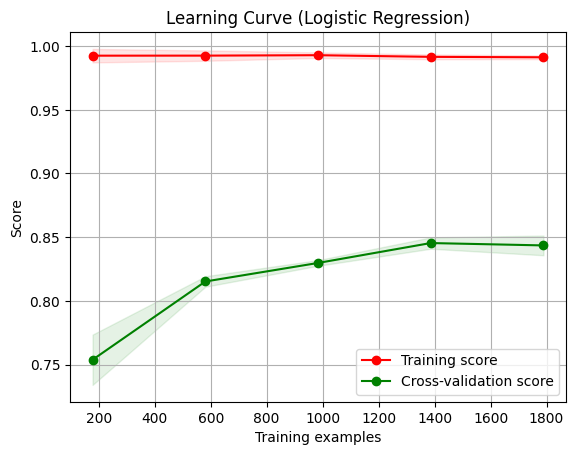

In [287]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression

# Function to plot the learning curve
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,
        train_sizes=np.linspace(0.1, 1.0, 5)
    )

    # Calculate the mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    # Add legend and show plot
    plt.legend(loc="best")
    return plt

# Logistic Regression model (best model based on accuracy)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Plot learning curve for Logistic Regression
plot_learning_curve(log_reg, "Learning Curve (Logistic Regression)", X_train_vectorized, y_train, cv=3)
plt.show()

#Logistic Regression ROC Curve:

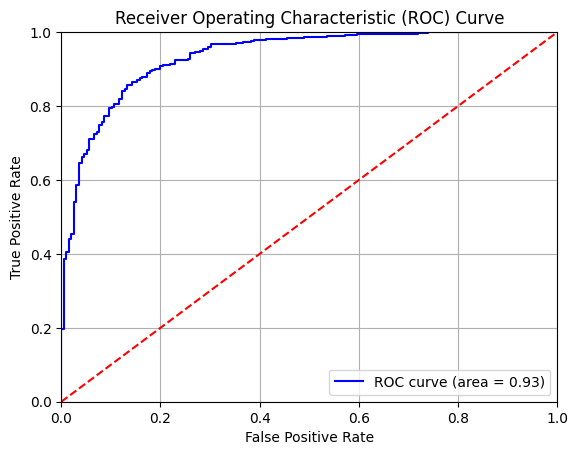

In [288]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# Logistic Regression model (best model based on accuracy)
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model
log_reg.fit(X_train_vectorized, y_train)

# Predict probabilities for the test set
y_prob = log_reg.predict_proba(X_test_vectorized)[:, 1]  # Probability of positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

#Logistic Regression (Precision, Recall, and F1-Score):

In [289]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_vectorized, y_train)  # Fit the model with training data

# Step 2: Predict on the validation/test set
y_pred_log_reg_val = log_reg.predict(X_test_vectorized)

# Step 3: Precision, Recall, and F1-Score (weighted average)
precision = precision_score(y_test, y_pred_log_reg_val, average='weighted')
recall = recall_score(y_test, y_pred_log_reg_val, average='weighted')
f1 = f1_score(y_test, y_pred_log_reg_val, average='weighted')

# Step 4: Print the results
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

Precision: 88.10%
Recall: 88.23%
F1-Score: 87.86%


#Logistic Regression ROC Curve (Multiclass):

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:84: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/

y_score shape: (671, 3)
y_test_bin shape: (671, 3)


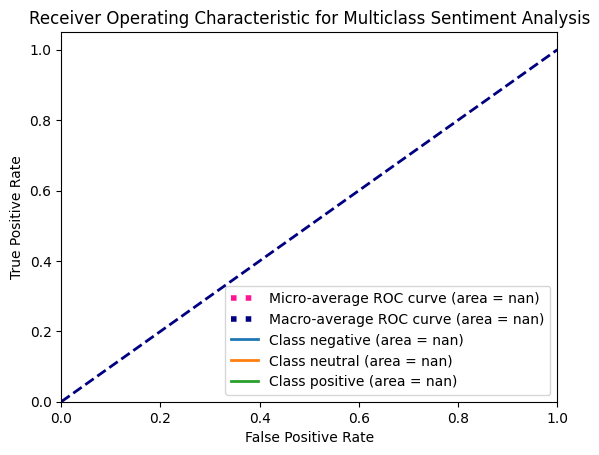

In [296]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming y_train and y_test are your labels
classes = ['negative', 'neutral', 'positive']  # Define your classes
y_train_bin = label_binarize(y_train, classes=classes)
y_test_bin = label_binarize(y_test, classes=classes)

# Train the One-vs-Rest Logistic Regression classifier
log_reg_clf = LogisticRegression(max_iter=1000, random_state=42)
ovr_clf = OneVsRestClassifier(log_reg_clf)
ovr_clf.fit(X_train_vectorized, y_train_bin)  # Use vectorized training data

# Compute decision function scores for each class
y_score = ovr_clf.predict_proba(X_test_vectorized)  # Use predict_proba for probabilities

# Check dimensions
print("y_score shape:", y_score.shape)
print("y_test_bin shape:", y_test_bin.shape)

fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC area for each class
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= len(classes)

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='Micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='Macro-average ROC curve (area = {0:0.2f})'.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

for i in range(len(classes)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {classes[i]} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Sentiment Analysis')
plt.legend(loc="lower right")
plt.show()

#Logistic Regression (Precision-Recall Curve):

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:980: UserWarning: No positive class f

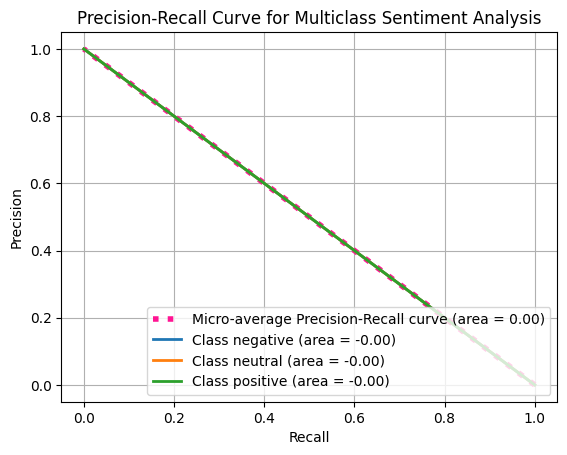

In [297]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming the Logistic Regression model has been trained in a One-vs-Rest scheme
# y_test_bin: Binarized y_test for multiclass
# y_score: Decision function (or predicted probabilities) from One-vs-Rest Logistic Regression

# Compute Precision-Recall and plot curve
precision = {}
recall = {}
average_precision = {}

for i in range(len(classes)):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_score[:, i])

# Compute micro-average Precision-Recall curve and average precision
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_score.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_score, average="micro")

# Plot Precision-Recall curve for each class
plt.figure()
plt.plot(recall["micro"], precision["micro"],
         label='Micro-average Precision-Recall curve (area = {0:0.2f})'.format(average_precision["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for i in range(len(classes)):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {classes[i]} (area = {average_precision[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass Sentiment Analysis')
plt.legend(loc="lower right")
plt.grid()
plt.show()

#Confusion Matrix with Logistic Regression:

In [303]:
# unique values of y_test and y_train
unique_y_test = np.unique(y_test)
unique_y_train = np.unique(y_train)

print("Unique values in y_test:", unique_y_test)
print("Unique values in y_train:", unique_y_train)

Unique values in y_test: [0 1]
Unique values in y_train: [0 1]


Unique true labels: [0 1]
Unique predicted labels: [0 1]


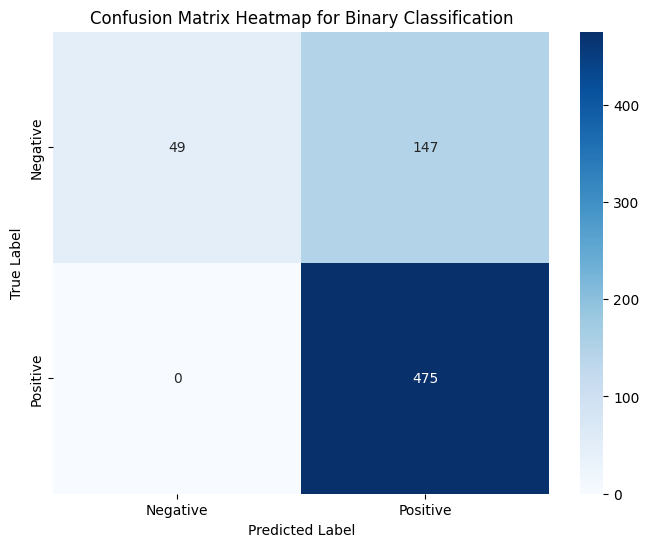

In [302]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming Logistic Regression predictions
y_pred_log_reg_val = log_reg.predict(X_test_vectorized)  # Predict on vectorized test data

# Ensure that both true and predicted labels are integers (0 and 1)
y_test_labels = y_test  # Assuming y_test contains 0 and 1

# Check unique values in the true and predicted labels
print("Unique true labels:", np.unique(y_test_labels))
print("Unique predicted labels:", np.unique(y_pred_log_reg_val))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_log_reg_val)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for Binary Classification')
plt.show()